In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.simple_keypoint_dataset import SimpleKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
keypoint_2d_path = dataset_root_path / 'keypoint_detection_results'
keypoint_3d_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_hip=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/groundtruth/linear_model/'


train_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_train.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)
val_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_val.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)
test_dataset = SimpleKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_with_ground_truth_bbox_test.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_hip=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234


skipping problematic image 262501
skipping problematic image 278126
skipping problematic image 293751
skipping problematic image 309376
skipping problematic image 325001
skipping problematic image 340626
skipping problematic image 356251
skipping problematic image 371876
skipping problematic image 512501
skipping problematic image 528126
skipping problematic image 543751
skipping problematic image 559376
skipping problematic image 575001
skipping problematic image 590626
skipping problematic image 606251
skipping problematic image 621876
skipping problematic image 762501
skipping problematic image 778126
skipping problematic image 793751
skipping problematic image 809376
skipping problematic image 825001
skipping problematic image 840626
skipping problematic image 856251
skipping problematic image 871876
skipping problematic image 387501
skipping problematic image 403126
skipping problematic image 418751
skipping problematic image 434376
skipping problematic image 637501
skipping probl

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/groundtruth/linear_model/lightning_logs


train_dataset 74976 val_dataset 37488 test_dataset 30339


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 5543.667793273926


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 5855 batches: 410.1300796059642
val MPJPE from: 37440 samples : 279.26355600357056


Validation: 0it [00:00, ?it/s]

check #2
training loss from 5855 batches: 306.54578828893085
val MPJPE from: 37440 samples : 278.1791090965271


Validation: 0it [00:00, ?it/s]

check #3
training loss from 5855 batches: 303.10350736423396
val MPJPE from: 37440 samples : 277.4679362773895


Validation: 0it [00:00, ?it/s]

check #4
training loss from 5855 batches: 301.63801076776645
val MPJPE from: 37440 samples : 276.3424217700958


Validation: 0it [00:00, ?it/s]

check #5
training loss from 5855 batches: 300.78842638905087
val MPJPE from: 37440 samples : 276.5553891658783


Validation: 0it [00:00, ?it/s]

check #6
training loss from 5855 batches: 300.28700759836386
val MPJPE from: 37440 samples : 276.1993408203125


Validation: 0it [00:00, ?it/s]

check #7
training loss from 5855 batches: 299.94238614017996
val MPJPE from: 37440 samples : 276.56954526901245


Validation: 0it [00:00, ?it/s]

check #8
training loss from 5855 batches: 299.66095569396407
val MPJPE from: 37440 samples : 276.01444721221924


Validation: 0it [00:00, ?it/s]

check #9
training loss from 5855 batches: 299.4127589754321
val MPJPE from: 37440 samples : 276.0567367076874


Validation: 0it [00:00, ?it/s]

check #10
training loss from 5855 batches: 299.2380723548078
val MPJPE from: 37440 samples : 276.1472761631012


Validation: 0it [00:00, ?it/s]

check #11
training loss from 5855 batches: 299.0765520642701
val MPJPE from: 37440 samples : 275.8108675479889


Validation: 0it [00:00, ?it/s]

check #12
training loss from 5855 batches: 298.9208132155831
val MPJPE from: 37440 samples : 275.8442461490631


Validation: 0it [00:00, ?it/s]

check #13
training loss from 5855 batches: 298.79999688097195
val MPJPE from: 37440 samples : 276.04663372039795


Validation: 0it [00:00, ?it/s]

check #14
training loss from 5855 batches: 298.72138530754006
val MPJPE from: 37440 samples : 275.820791721344


Validation: 0it [00:00, ?it/s]

check #15
training loss from 5855 batches: 298.6838114760453
val MPJPE from: 37440 samples : 275.7924795150757


Validation: 0it [00:00, ?it/s]

check #16
training loss from 5855 batches: 298.60238460879566
val MPJPE from: 37440 samples : 275.7207453250885


Validation: 0it [00:00, ?it/s]

check #17
training loss from 5855 batches: 298.5474487790483
val MPJPE from: 37440 samples : 275.79212188720703


Validation: 0it [00:00, ?it/s]

check #18
training loss from 5855 batches: 298.47369689293953
val MPJPE from: 37440 samples : 275.9779691696167


Validation: 0it [00:00, ?it/s]

check #19
training loss from 5855 batches: 298.449364256187
val MPJPE from: 37440 samples : 275.9183347225189


Validation: 0it [00:00, ?it/s]

check #20
training loss from 5855 batches: 298.427695320978
val MPJPE from: 37440 samples : 275.77680349349976


Validation: 0it [00:00, ?it/s]

check #21
training loss from 5855 batches: 298.41638368790626
val MPJPE from: 37440 samples : 275.78821778297424


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/groundtruth/linear_model/lightning_logs/version_0/checkpoints/epoch=79-step=93680.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/synthetic_cabin_ir_1m/A_Pillar_Codriver/groundtruth/linear_model/lightning_logs/version_0/checkpoints/epoch=79-step=93680.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 274.720765043016
PJPE
                      PJPE
nose            268.564254
left_eye        271.200486
right_eye       264.575245
left_ear        268.806945
right_ear       253.808686
left_shoulder   275.693780
right_shoulder  220.211177
left_elbow      312.889202
right_elbow     249.571621
left_wrist      347.243128
right_wrist     309.791722
left_hip        278.263968
right_hip       250.749732
activities_mpjpe:
{}
test mpjpe: 274.720765043016


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     274.720765043016      │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 274.720765043016}]

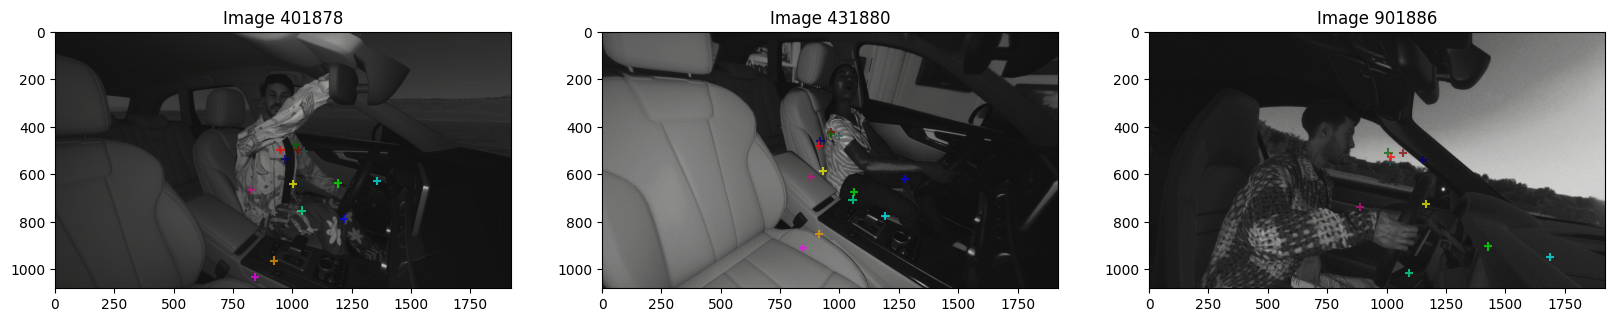

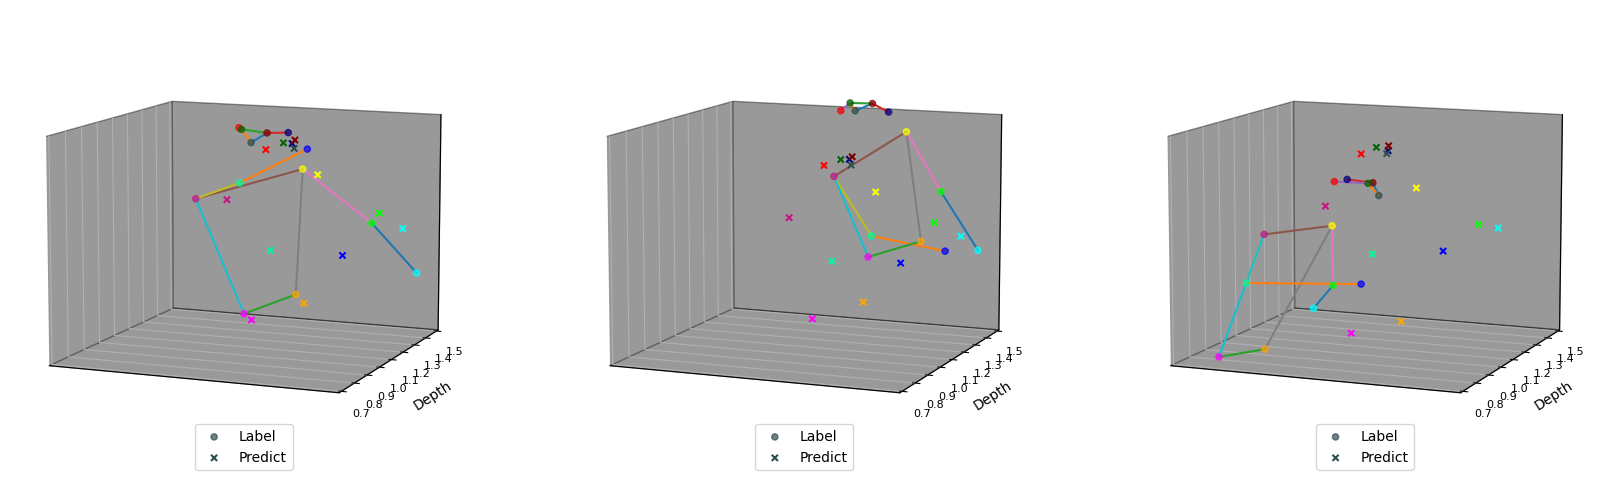

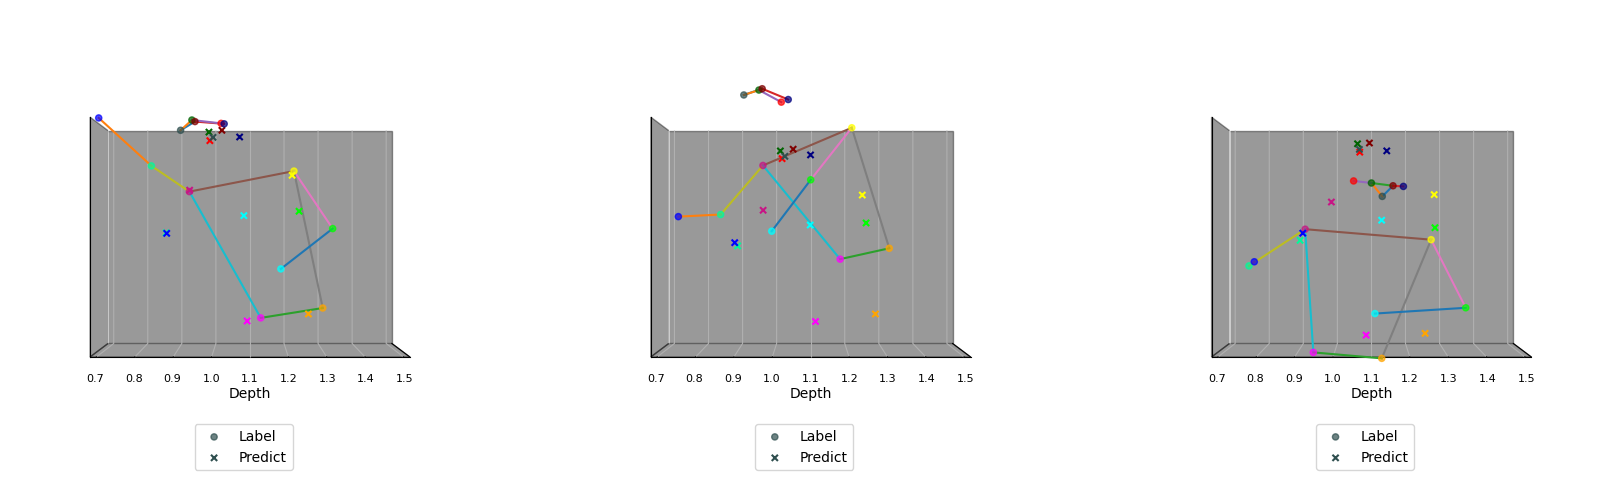

In [3]:
plot_samples(
    dataset_root_path,
    trainer.model,
    val_loader,
    img_figsize=(20, 10),
    img_width=image_width,
    img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_idices=[5000, 10000, 30000]
)